In [64]:
import pandas as pd #데이터 구성 패키지 : Series, DataFrame
import numpy as np #행렬 연산 패키지
import matplotlib #데이터 시각화 패키지
import matplotlib.pyplot as plt
import seaborn as sns #데이터 시각화(추세 등)패키지
from scipy import stats #통계 분석 패키지
import scipy.stats 

%matplotlib inline 
#jupyter notebook 내 그래프를 바로 그리기 위한 설정  

In [2]:
matplotlib.rc('font', family='Malgun Gothic') #matplotlib 패키지 한글 깨짐 처리 시작
plt.rc('font', family='Malgun Gothic') 

# Weibell 분포
#### 어떤 제품의 수명시간 x가 형상모수 5.2, 척도모수 2,200인 와이블 분포를 따른다고 할 때, 이 제품이 적어도 2,500시간 이상 작동할 확률을 구하라. 

In [44]:
#와이블 분포 :
#-지수분포를 일반화하여 다양한 확률분포 형태를 모두 나타낼 수 있도록 고안됨
#-물품의 신뢰성과 수명시험 문제에 적용되는 분포 

x=2500 #구하고자 하는 확률의 범위
alpha=5.2 #형상모수
beta=2200 #척도모수
prob=stats.weibull_min.cdf(x,alpha,scale=beta)#와이블분포의 누적확률값 계산 
print("P(X<=x):{:.3f}".format(1-prob)) #결과 출력
print("")
print("결론: 와이블 분포에 따르면 제품이 2500시간 이상 작동할 확률은 14.3%이다.")

P(X<=x):0.143

와이블 분포에 따르면 제품이 2500시간 이상 작동할 확률은 14.3%이다.


# 이항분포 
#### 도장공정에서 광택도 불량이 30%나 된다고 함
#### 5대의 차량을 임의로 선택했을 때 불량대수가 각각 0,1,2,3,4,5대가 나올 확률은 얼마인가요?

In [5]:
#이항분포 : 
#-베르누이 시행을 n번함
#-각 시행마다 확률 일정
#-각 시행은 독립적 

n=5 #시행횟수
for i in range(n+1): #시행의 반복을 for문을 써서 나타냄 
    prob=stats.binom.pmf(k=i,n=n,p=0.3)
    print("P(X={0})={1:.3f}".format(i,prob)) 

P(X=0)=0.168
P(X=1)=0.360
P(X=2)=0.309
P(X=3)=0.132
P(X=4)=0.028
P(X=5)=0.002


# 포아송 분포
#### 한 상점에는 평균 1시간에 3명씩 포아송분포로 손님이 도착한다.
#### 이 때 10시에서 11시 사이에 다음이 발생할 확률을 구하시오.
#### 1) 2명의 손님이 도착
#### 2) 1명 이하의 손님이 도착
#### 3) 3명 이상의 손님이 도착

In [10]:
#포아송 분포
#-일정한 시간, 일정한 공간에서 발생하는 성공횟수에 대한 이산확률분포

mu=3 #일정 단위당 평균발생 횟수 
prob1=stats.poisson.cdf(1,mu) #1명의 손님이 도착할 누적 확률밀도함수 값 Pr(X=0)+Pr(X=1)
prob2=stats.poisson.pmf(2,mu) #2명의 손님이 도착할 확률밀도함수 값 Pr(X=2)
prob3=stats.poisson.cdf(2,mu) #2명의 손님이 도착할 누적 확률밀도함수 값 Pr(X=0)+Pr(X=1)+Pr(X=2)
print("{0}명의 손님이 도착할 확률: {1:.1f}%".format(2,prob2*100))
print("{0}명 이하의 손님이 도착할 확률: {1:.1f}%".format(1,prob1*100))
print("{0}명 이상의 손님이 도착할 확률: {1:.1f}%".format(3,(1-prob3)*100))

2명의 손님이 도착할 확률: 22.4%
1명 이하의 손님이 도착할 확률: 19.9%
3명 이상의 손님이 도착할 확률: 57.7%


# 정규성 검정

In [43]:
# 정규성 검정 
# - 확률 분포가 정규분포를 따르는지 아닌지를 확인한다. 
# - 귀무가설 H0: 모집단은 정규분포를 따른다
# - 대립가설 H1: 모집단은 정규분포를 따르지 않는다. 

# 실습1
from scipy.stats import shapiro #shapiro 패키지 불러오기 
df_2sample=pd.read_csv("/home/piai/바탕화면/강연주/수업/통계 이해/2sample_t_test.csv", engine='python') #값 불러오기 
sample_1=df_2sample['Mat_A'][0:10] #결측치 제거를 위해 범위 성절
statistic_1,p_1=shapiro(sample_1) #Shapiro-Wilk test 
print("Shapiro_Wilk Test: statistic={0:.3f}, p-value={1:.3f}".format(statistic_1,p_1))
print("")
print("H0: 정규분포")
print("H1: 비정규분포")
print("결론: p-value가 0.05보다 크므로 정규분포이다.")
print("")

# 실습2
sample_2=df_2sample['Mat_B'][0:10]
statistic_2,p_2=shapiro(sample_2)
print("Shapiro_Wilk Test: statistic={0:.3f}, p-value={1:.3f}".format(statistic_2,p_2))
print("")
print("H0: 정규분포")
print("H1: 비정규분포")
print("결론: p-value가 0.05보다 크므로 정규분포이다.")


Shapiro_Wilk Test: statistic=0.906, p-value=0.256

H0: 정규분포
H1: 비정규분포
결론: p-value가 0.05보다 크므로 정규분포이다.

Shapiro_Wilk Test: statistic=0.973, p-value=0.917

H0: 정규분포
H1: 비정규분포
결론: p-value가 0.05보다 크므로 정규분포이다.


# 모평균 추정(모표준편차 아는 경우)

In [15]:
# 모평균 추정

df=pd.DataFrame({'sample':[18,18,20,21,20,23,19,18,17,21,22,20,20,21,20,19,19,18,17,19]}) #df입력
sigma=3.8 #표준편차
n=20
lower,upper=stats.norm.interval(0.95,loc=np.mean(df),scale=sigma/np.sqrt(n)) #95%신뢰구간
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))


신뢰구간:([17.83],[21.17])


# 모평균 추정(모표준편차 모르는 경우)

In [18]:
df1=pd.DataFrame({'sample':[73,71,74,69,70,73,70,68,75,72,70,72,73,70,70,72,71,70,75,72]}) #df입력
lower,upper=stats.t.interval(0.95,len(df1)-1,loc=np.mean(df1),scale=scipy.stats.sem(df1)) #95%신뢰구간
print("신뢰구간:({0},{1})".format(lower.round(2),upper.round(2)))

신뢰구간:([70.6],[72.4])


# 평균 검정 (모집단 표준편차를 모르는 경우)
#### 고객서비스센터의 고객만족도 평균은 78.0이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 데이터를 얻었다. 개선활동이 만족도를 변화시켰는가? 

In [51]:
df2=pd.DataFrame({'sample':[85.0,79.0,79.1,79.9,81.6,78.6,85.4,83.4,78.1,79.2]}) #데이터 입력
t_result=stats.ttest_1samp(df2,78) #1-Sample t-test 
t,p=t_result.statistic.round(3), t_result.pvalue.round(3) #1-Sample t-test의 t,p값 저장 
print("1-Sample t-test")
print("t 통계량:{}".format(t))
print("p-value:{}".format(p)) 
print("")
print("H0: 만족도의 변화가 없다.")
print("H1: 만족도에 변화가 있다.")
print("결론: p-value 값은 유의수준(0.05)보다 작으므로 대립 가설을 채택하여 개선활동이 만족도를 변화시켰다고 볼 수 있다.") 

1-Sample t-test
t 통계량:[3.379]
p-value:[0.008]

H0: 만족도의 변화가 없다.
H1: 만족도에 변화가 있다.
결론: p-value 값은 유의수준(0.05)보다 작으므로 대립 가설을 채택하여 개선활동이 만족도를 변화시켰다고 볼 수 있다.


# 2 Sample t-test : 두 집단 간 평균이 같은지 비교
#### 제품을 A공급자와 B공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다. 공급자 간에 모평균에 차이가 있다고 할 수 있는가? 유의수준(0.05)

In [57]:
dfa=pd.DataFrame({'sample':[1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344]})#데이터 불러오기
dfb=pd.DataFrame({'sample':[1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})
a_result=stats.ttest_ind(dfa,dfb) #2-Sample t-test
t1,p1=a_result.statistic.round(3), a_result.pvalue.round(3) #2-Sample t-test의 t값 p값 저장
print("2-Sample t-test")
print("t 통계량:{}".format(t1))
print("p-value:{}".format(p1)) 
print("")
print("H0: 두 집단의 평균이 같다.")
print("H1: 두 집단의 평균이 다르다.")
print("결론 : p-value 값은 유의수준(0.05)보다 크므로 귀무 가설을 채택하여 A공급자와 B공급자가 제공하는 제품의 모평균은 같다고 볼 수 있다.") 

2-Sample t-test
t 통계량:[1.7]
p-value:[0.111]

H0: 두 집단의 평균이 같다.
H1: 두 집단의 평균이 다르다.
결론 : p-value 값은 유의수준(0.05)보다 크므로 귀무 가설을 채택하여 A공급자와 B공급자가 제공하는 제품의 모평균은 같다고 볼 수 있다.


# Paired t-test : 짝을 이루는 집단의 평균의 차이가 있는지 검정
#### 회사원 10명에 대해 영어점수가 회사가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다. 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [58]:
bef=pd.DataFrame({'sample':[720,589,780,648,720,589,780,648,780,648]}) #데이터 입력
aft=pd.DataFrame({'sample':[710,580,787,712,750,600,782,670,790,680]})
p_result=stats.ttest_rel(bef,aft)
t2,p2=p_result.statistic.round(4),p_result.pvalue.round(4)
print("Paired t-test")
print("t 통계량:{}".format(t2))
print("p-value:{}".format(p2))
print("")
print("H0: 학원 가기 전후에 영어점수의 차이가 없다.")
print("H1: 학원 가기 전후에 영어점수의 차이가 있다.")
print("결론 : p-vlalue값은 유의수준(0.05)보다 작으므로 대립 가설을 채택하여 학원 수장 전후의 점수는 차이가 있다고 볼 수 있다.")

Paired t-test
t 통계량:[-2.2661]
p-value:[0.0497]

H0: 학원 가기 전후에 영어점수의 차이가 없다.
H1: 학원 가기 전후에 영어점수의 차이가 있다.
결론 : p-vlalue값은 유의수준(0.05)보다 작으므로 대립 가설을 채택하여 학원 수장 전후의 점수는 차이가 있다고 볼 수 있다.


# 1 Proportion test
#### 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다. 이 동전은 정상인가를 유의수준(=0.05) 로써 검정하라. 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다. 

In [59]:
from statsmodels.stats.proportion import proportions_ztest
count=40
n_obs=100
value=0.5
stat,pval=proportions_ztest(count,n_obs,value)

print("1 Proportion test")
print("z: {0:0.3f}".format(stat))
print("p-value: {0:0.3f}".format(pval)) 
print("")
print("H0: 앞면이 나올 확률은 50%이다.")
print("H1: 앞면이 나올 확률은 50%가 아니다.")
print("p-value가 0.05보다 작으므로 대립 가설을 채택한다. 동전이 앞면이 나올 확률은 50%가 아닐 수 있다.")

1 Proportion test
z: -2.041
p-value: 0.041

H0: 앞면이 나올 확률은 50%이다.
H1: 앞면이 나올 확률은 50%가 아니다.
p-value가 0.05보다 작으므로 대립 가설을 채택한다. 동전이 앞면이 나올 확률은 50%가 아닐 수 있다.


# 2 Proportion test 
#### 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다. 두 공정의 불량률은 같다고 할 수 있는가? (유의수준=0.05)
#### 공장A : N1=1200, X1=14
#### 공장B : N2=1200, X2=5

In [61]:
count1=np.array([14,5])
nobs1=np.array([1200,1200])
stat1,pval1=proportions_ztest(count1,nobs1)

print("2 Proportion test")
print("z:{0:0.3f}".format(stat1))
print("p-value: {0:0.3f}".format(pval1)) 
print("")
print("H0: 두 공정의 불량률은 같다.")
print("H1: 두 공정의 불량률은 다르다.")
print("p-value가 0.05보다 작으므로 대립가설을 채택한다. 두 공정의 불량률은 다르다고 할 수 있다.")

2 Proportion test
z:2.073
p-value: 0.038

H0: 두 공정의 불량률은 같다.
H1: 두 공정의 불량률은 다르다.
p-value가 0.05보다 작으므로 대립가설을 채택한다. 두 공정의 불량률은 다르다고 할 수 있다.


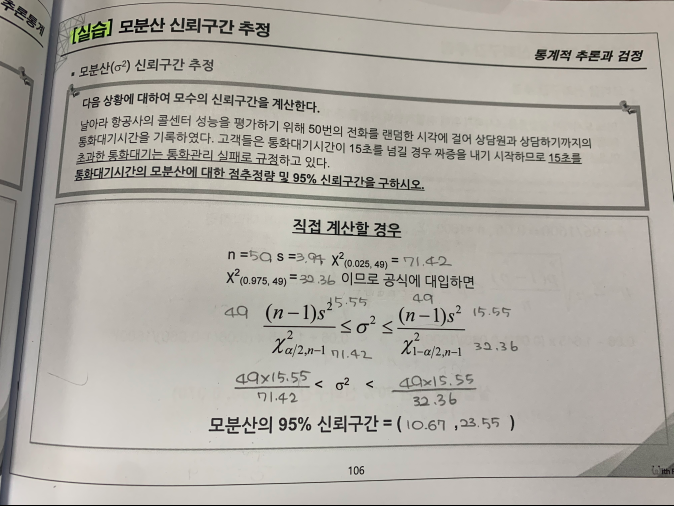

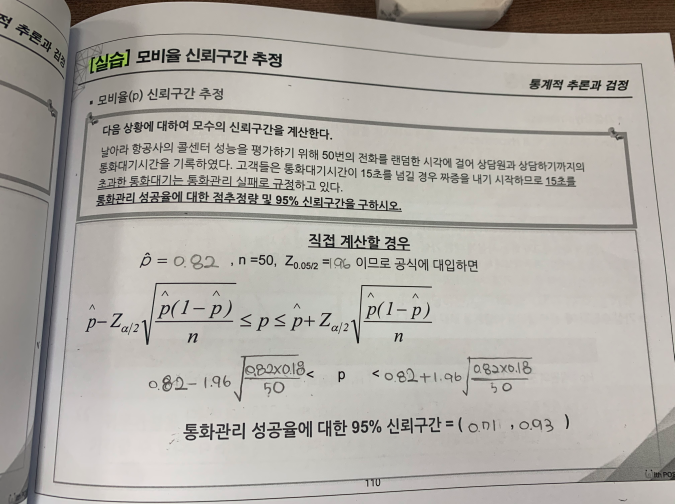